## Author- `Tinnaluri Naresh`

## Task-1 Prediction using Supervised ML

## Objective: Predict the percentage of students based on no. of study hours using Linear Regression and also predict the score if a student studies for 9.25 hours per day.

#### About Dataset

The given dataset has two Columns, one contains no.of study hours and the other one contains the marks scored by him. The dataset is Student Score Dataset.

#### About Model

Linear Regression is a machine learning algorithm based on supervised learning.It is a linear model e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). It shows the relationship between two variables by fitting a line to the observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. Here, the study hours is explanatory wheras score is dependent variable. Score is linearly related to the Number of hours a Student Studies.

### Data Science & Business Analytics Intern at The Spark Foundation

### Linear Regression with Python statsmodel and Scikit Learn

In this task we will see how the Python statsmodel and sklearn library for machine learning can be used to implement regressions. We will start with simple linear regression involving two variables.

### Importing Libraries

In [267]:
import warnings
warnings.filterwarnings('ignore')

In [268]:
import numpy as np
import pandas as pd

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

### Exploring the data

In [271]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [273]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [274]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


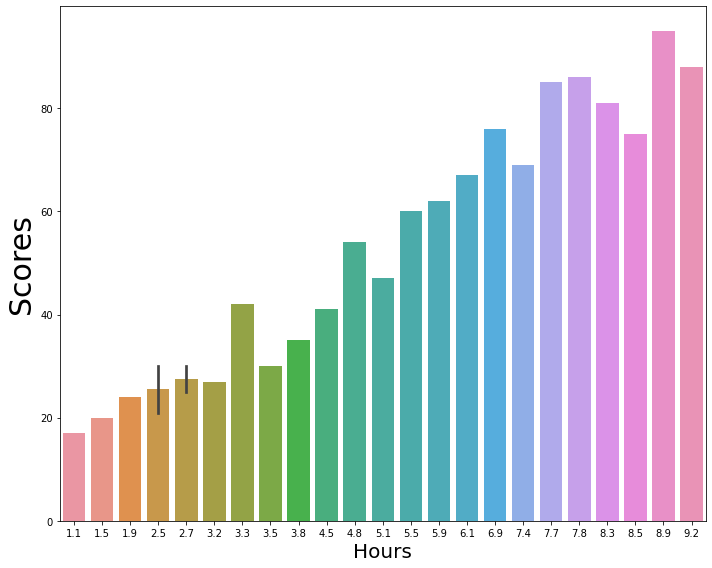

In [275]:
plt.figure(figsize = (10,8))
ax1 = sns.barplot(x=df.Hours, y= df.Scores)
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores',fontsize = 30)
plt.tight_layout();

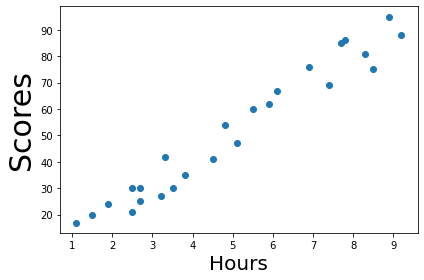

In [276]:
plt.scatter(df.Hours,df.Scores)
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores',fontsize = 30)
plt.tight_layout();

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Hours$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [277]:
X = df['Hours']
y = df['Scores']

In [278]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [280]:
# Let's now take a look at the train dataset

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [281]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [282]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [283]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [284]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [285]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.15e-11
Time:                        13:41:32   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Hours is 9.871714 , with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.957
Meaning that 95.7% of the variance in `Scores` is explained by `Hours`

This is a decent R-squared value.

   ###### 3. F statistic has a very low p value (practically low)
   Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 1.495142 + 9.871714 \times Hours $

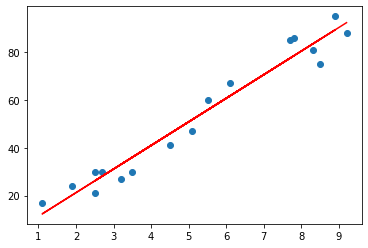

In [286]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.495142 + 9.871714*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [287]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

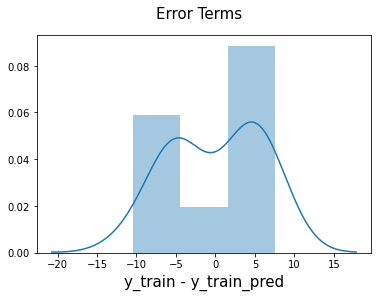

In [288]:
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean around 0. All good!

#### Looking for patterns in the residuals

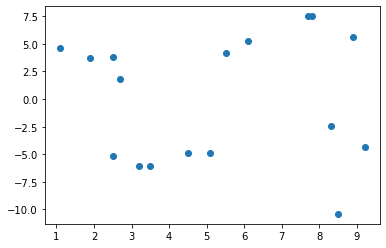

In [289]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [290]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [291]:
X_test_sm

,const,Hours
9,1.0,2.7
22,1.0,3.8
13,1.0,3.3
11,1.0,5.9
5,1.0,1.5
19,1.0,7.4
23,1.0,6.9
21,1.0,4.8


In [292]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [293]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

###### mean_squared_error

In [294]:
mean_square = mean_squared_error(y_test, y_pred)
mean_square

25.67841957328383

###### Checking the R-squared on the test set

In [295]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

##### Visualizing the fit on the test set

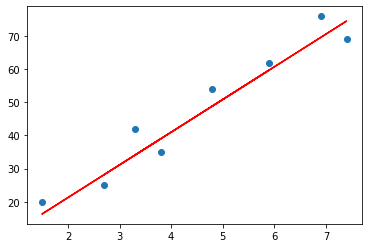

In [296]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.495142 + 9.871714 * X_test, 'r')
plt.show()

In [297]:
hours = [[1.0,9.25]]
pred = lr.predict(hours)
print("Score obtained by the student if he studies for 9.25 hours/day = {}".format(pred[0]))

Score obtained by the student if he studies for 9.25 hours/day = 92.80850057353507
